# Kaggle Competition

## 1. Exploration

### Preliminaries

In [1]:
from __future__ import unicode_literals, division

import IPython
import warnings
import requests
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt

from pylab import *
from IPython.display import HTML
from IPython.display import display as prnt

# Matplotlib in notebook
%matplotlib inline

# Notebook Options
warnings.filterwarnings('ignore')
np.set_printoptions(suppress=True)

# Matplotlib Styles
c = {'axes.labelsize': 17,
'axes.titlesize': 16,
'figure.figsize': [18, 8],
'grid.linewidth': 1.6,
'legend.fontsize': 17,
'lines.linewidth': 2,
'lines.markeredgewidth': 0.0,
'lines.markersize': 11,
'patch.linewidth': 0.5,
'xtick.labelsize': 16,
'xtick.major.pad': 20,
'xtick.major.width': 2,
'xtick.minor.width': 1,
'ytick.labelsize': 16.0,
'ytick.major.pad': 20,
'ytick.major.width': 2,
'ytick.minor.width': 1 }
wide_c = dict(c, **{'figure.figsize':[20,8]})

#### Utility Functions

In [2]:
def table(df,replace_match="",replace_str=""):
    return IPython.display.display(HTML(df.to_html().replace('<table border="1" class="dataframe">','<table class="table table-striped table-hover">').replace(replace_match,replace_str)))

### Load the Data

In [3]:
DATA_DIR = 'data/'
TRAIN_FILE = DATA_DIR + 'train.csv'
TEST_FILE = DATA_DIR + 'test.csv'

In [4]:
df = pd.read_csv(TRAIN_FILE)

### Inspect the Data

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
datetime      10886 non-null object
season        10886 non-null int64
holiday       10886 non-null int64
workingday    10886 non-null int64
weather       10886 non-null int64
temp          10886 non-null float64
atemp         10886 non-null float64
humidity      10886 non-null int64
windspeed     10886 non-null float64
casual        10886 non-null int64
registered    10886 non-null int64
count         10886 non-null int64
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.6+ KB


In [6]:
table(df.head())

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


#### Fix the Datatypes

In [11]:
df.datetime = pd.to_datetime(df.datetime)

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
datetime      10886 non-null datetime64[ns]
season        10886 non-null int64
holiday       10886 non-null int64
workingday    10886 non-null int64
weather       10886 non-null int64
temp          10886 non-null float64
atemp         10886 non-null float64
humidity      10886 non-null int64
windspeed     10886 non-null float64
casual        10886 non-null int64
registered    10886 non-null int64
count         10886 non-null int64
dtypes: datetime64[ns](1), float64(3), int64(8)
memory usage: 1020.6 KB


In [13]:
df = df.set_index('datetime')

#### Head & Tail

In [14]:
table(df.head(5))

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
datetime,,,,,,,,,,,
2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [15]:
table(df.tail(5))

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
datetime,,,,,,,,,,,
2012-12-19 19:00:00,4,0,1,1,15.58,19.695,50,26.0027,7,329,336
2012-12-19 20:00:00,4,0,1,1,14.76,17.425,57,15.0013,10,231,241
2012-12-19 21:00:00,4,0,1,1,13.94,15.910,61,15.0013,4,164,168
2012-12-19 22:00:00,4,0,1,1,13.94,17.425,61,6.0032,12,117,129
2012-12-19 23:00:00,4,0,1,1,13.12,16.665,66,8.9981,4,84,88


In [16]:
df['windspeed'].describe()

count    10886.000000
mean        12.799395
std          8.164537
min          0.000000
25%          7.001500
50%         12.998000
75%         16.997900
max         56.996900
Name: windspeed, dtype: float64

In [17]:
dfw = pd.DataFrame([int(x) for x in df['windspeed']])
dfw[0].value_counts()

0     1313
19    1168
8     1120
11    1057
12    1042
7     1034
15     961
6      872
16     824
22     372
23     274
26     235
27     187
30     111
31      89
32      80
35      58
39      27
36      22
43      20
40      11
46       3
56       2
47       2
50       1
51       1
Name: 0, dtype: int64

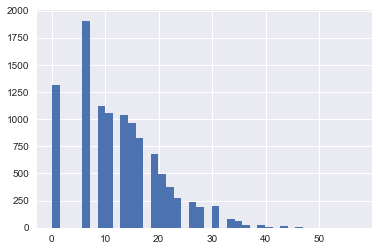

In [18]:
df.windspeed.hist(bins=40);

In [19]:
table(df.head(5))

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
datetime,,,,,,,,,,,
2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


#### Random sample of rows

In [21]:
from random import sample
table(df.ix[sample(df.index,10)])
df.sample(10)

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
datetime,,,,,,,,,,,
2011-05-11 03:00:00,2,0,1,1,20.50,24.240,63,15.0013,0,3,3
2012-02-10 05:00:00,1,0,1,1,9.84,11.365,52,15.0013,0,17,17
2012-01-13 14:00:00,1,0,1,1,10.66,10.605,33,36.9974,10,119,129
2012-07-14 19:00:00,3,0,0,1,29.52,35.605,84,6.0032,156,275,431
2012-08-10 09:00:00,3,0,1,2,26.24,28.790,89,0.0000,21,199,220
2011-05-06 08:00:00,2,0,1,1,17.22,21.210,77,16.9979,35,415,450
2011-07-02 15:00:00,3,0,0,1,35.26,36.365,19,11.0014,168,163,331
2012-04-16 12:00:00,2,1,0,1,27.88,31.820,57,16.9979,75,196,271
2012-11-09 16:00:00,4,0,1,1,18.86,22.725,38,11.0014,57,377,434


,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
datetime,,,,,,,,,,,
2011-03-15 01:00:00,1,0,1,1,12.30,15.150,62,6.0032,4,6,10
2011-06-15 15:00:00,2,0,1,1,31.16,33.335,27,0.0000,33,131,164
2011-12-16 13:00:00,4,0,1,2,13.94,15.150,39,23.9994,12,125,137
2011-06-11 07:00:00,2,0,0,1,29.52,33.335,58,12.9980,18,50,68
2011-03-10 14:00:00,1,0,1,3,18.04,21.970,0,19.9995,0,12,12
2012-09-13 03:00:00,3,0,1,1,21.32,25.000,83,0.0000,2,9,11
2011-12-14 08:00:00,4,0,1,2,10.66,15.150,87,0.0000,9,458,467
2012-05-19 07:00:00,2,0,0,1,18.86,22.725,67,7.0015,28,67,95
2011-11-06 08:00:00,4,0,0,2,11.48,15.150,87,6.0032,19,71,90


## 1.1 Univariate

In [ ]:
# df.hist(figsize=(12,12));

#### Checking for normality

In [ ]:
# from statsmodels.graphics.gofplots import qqplot

# with sns.plotting_context("poster", font_scale=1, rc=c):
#     qqplot(df['windspeed'], line='45', fit=True);

## 1.2 Bivariate

In [ ]:
# import math
# import matplotlib.pyplot as plt

# b, g, r, p = sns.color_palette("muted", 4)

# hue = 'workingday'
# grid_size = 6

# cols = df.columns.difference([hue])
# grid_split = math.ceil(len(cols) / grid_size)
# grid_splits = int(grid_split**2)

# for i in range(1, grid_splits + 1):
#     x_step = (i + (grid_split - 1 )) % grid_split
#     y_step = int(math.ceil(i / grid_split) - 1)
    
#     x_vars = cols[x_step*grid_size:(x_step+1)*grid_size]
#     y_vars = cols[y_step*grid_size:(y_step+1)*grid_size]

#     with sns.plotting_context("poster", font_scale=1, rc=c):
#         dx = df.sample(250)
#         g = sns.PairGrid(dx, hue=hue,x_vars=x_vars, y_vars=y_vars)
#         g.map_offdiag(plt.scatter)
#         g.add_legend()

#### Working Day vs. Count

In [ ]:
# with sns.plotting_context("poster", font_scale=1, rc=c):
#     g = sns.FacetGrid(df, col="workingday")
#     g.map(plt.hist, "count");

In [ ]:
# with sns.plotting_context("poster", font_scale=1, rc=c):
#     g = sns.FacetGrid(df, col="season", size=4, aspect=.5)
#     g.map(sns.boxplot, "atemp");

### 1.3 Multivariate

In [ ]:
# with sns.plotting_context("poster", font_scale=1, rc=c):
#     g = sns.FacetGrid(df, col="season", hue="count")
#     g.map(plt.scatter, "temp", "atemp", alpha=.7)